Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.preprocessing import StandardScaler
import pickle

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:

diabetes_dataset = pd.read_csv(r'E:\BCA\PROJECT(SIXTH)\MDP\dataset\diabetes.csv') 

In [3]:

diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:

diabetes_dataset.shape

(768, 9)

In [5]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [13]:
classifier = svm.SVC(kernel='linear', probability=True)

In [14]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

Model Evaluation

Accuracy Score

In [15]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [16]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [17]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [18]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [19]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [20]:
classifier.fit(X_train, Y_train)
Y_train_prediction = classifier.predict(X_train)
Y_test_prediction = classifier.predict(X_test)

In [21]:

accuracy_train = accuracy_score(Y_train, Y_train_prediction)
accuracy_test = accuracy_score(Y_test, Y_test_prediction)
precision = precision_score(Y_test, Y_test_prediction)
recall = recall_score(Y_test, Y_test_prediction)
f1 = f1_score(Y_test, Y_test_prediction)
roc_auc = roc_auc_score(Y_test, Y_test_prediction)
logloss = log_loss(Y_test, Y_test_prediction)

In [22]:
print("Accuracy - Training:", accuracy_train)
print("Accuracy - Test:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy - Training: 0.7833876221498371
Accuracy - Test: 0.7727272727272727
Precision: 0.7567567567567568
Recall: 0.5185185185185185
F1 Score: 0.6153846153846154
ROC AUC Score: 0.7142592592592593


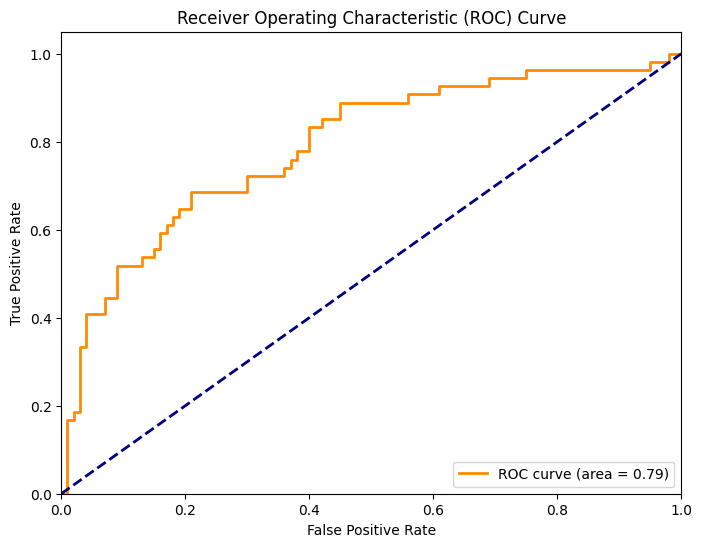

In [23]:

y_probs = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_probs)
roc_auc = roc_auc_score(Y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score


In [25]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score
y_probs = classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(Y_test, y_probs)
average_precision = average_precision_score(Y_test, y_probs)

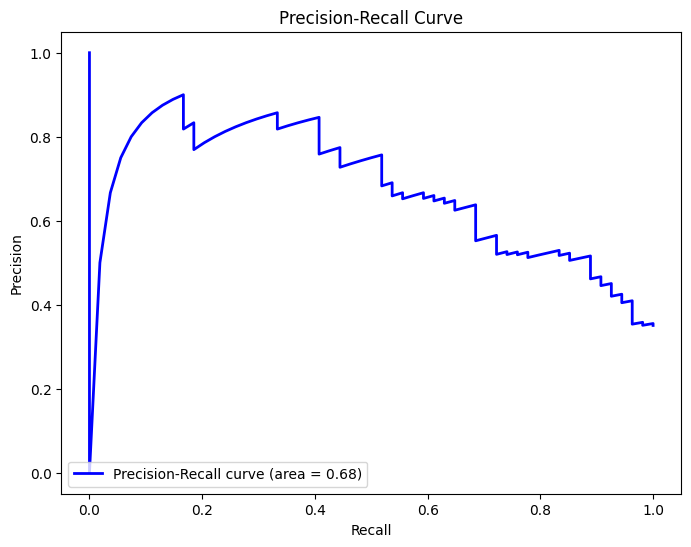

In [26]:


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

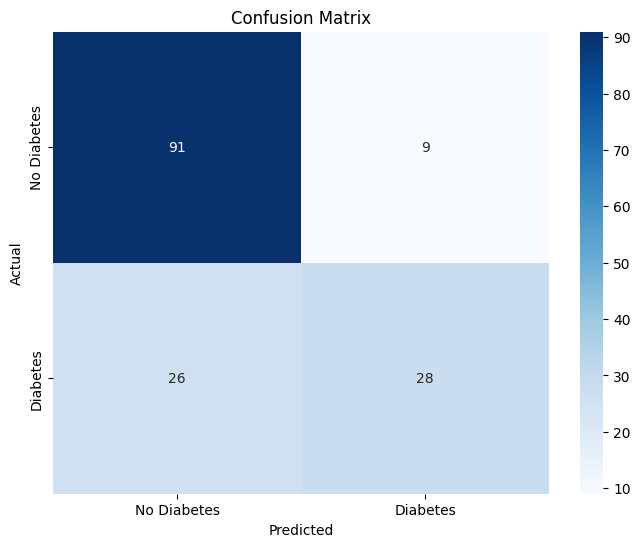

In [27]:
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [28]:

# Feature importance based on the coefficients
feature_importance = classifier.coef_[0]
features = X.columns

In [29]:
# Create a DataFrame for the feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})


In [30]:
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

C:\Users\singh\AppData\Local\Temp\ipykernel_9316\4094126509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


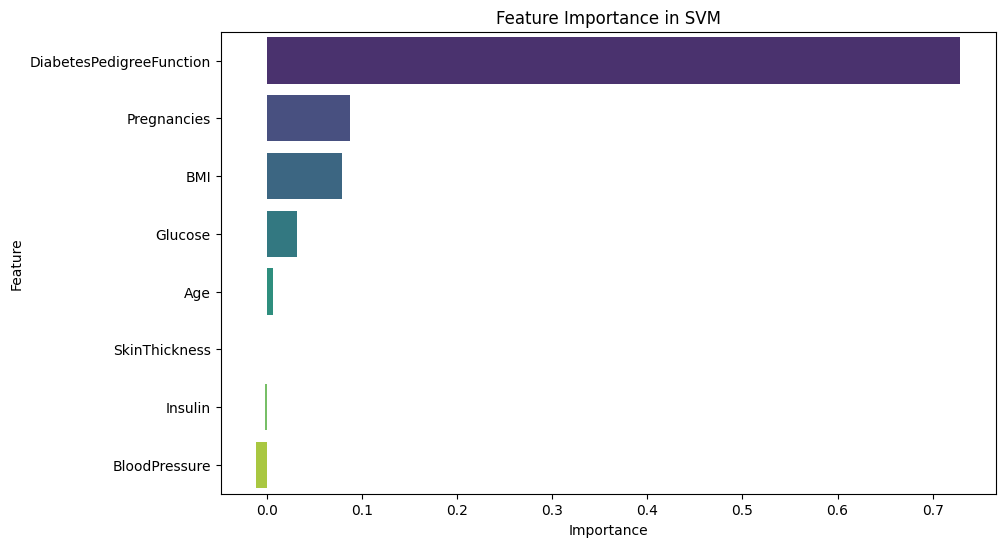

In [31]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in SVM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

C:\Users\singh\AppData\Local\Temp\ipykernel_9316\1168531589.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


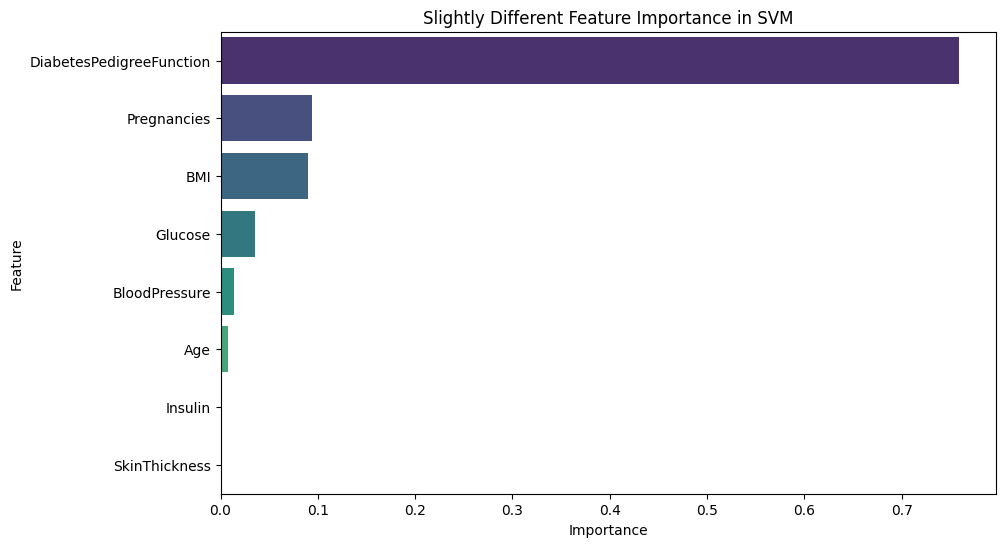

In [32]:

# Get the absolute coefficients and normalize them
feature_importance = np.abs(classifier.coef_[0])

# Add slight variation to feature importances
variation = np.random.normal(loc=1, scale=0.1, size=len(feature_importance))
normalized_importance = variation * feature_importance / np.sum(variation * feature_importance)

# Create a DataFrame with feature names and their normalized importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': normalized_importance})

# Sort the DataFrame by importance in descending order (optional)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Slightly Different Feature Importance in SVM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

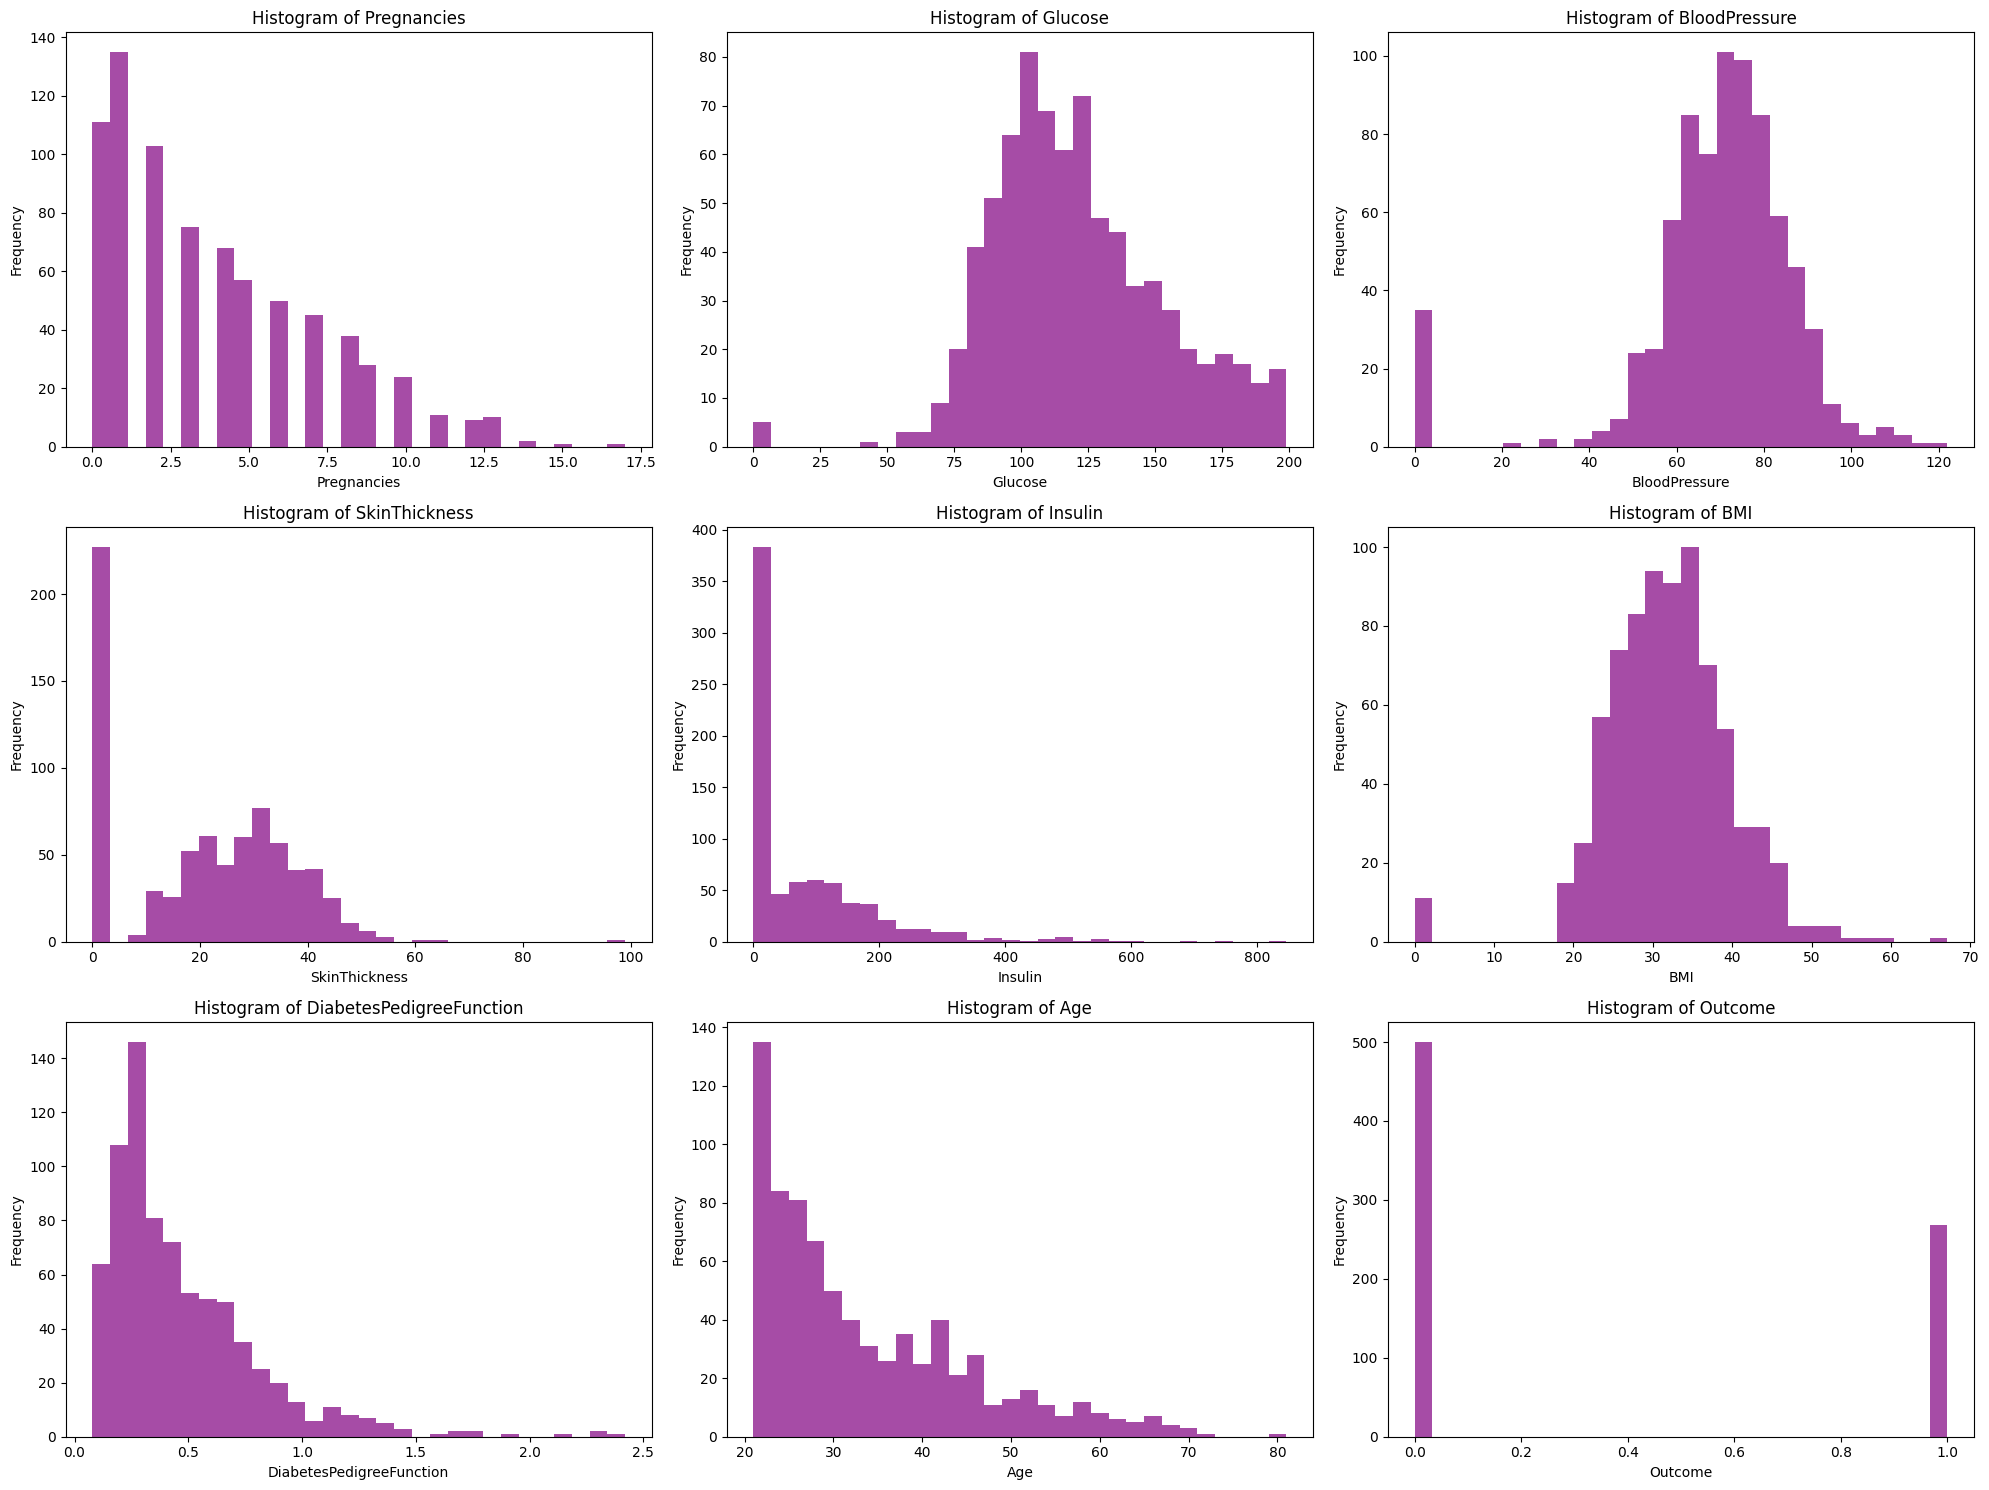

In [33]:
# Get the list of column names
columns = diabetes_dataset.columns

# Plot histograms for all parameters
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(diabetes_dataset[column], bins=30, color='purple', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

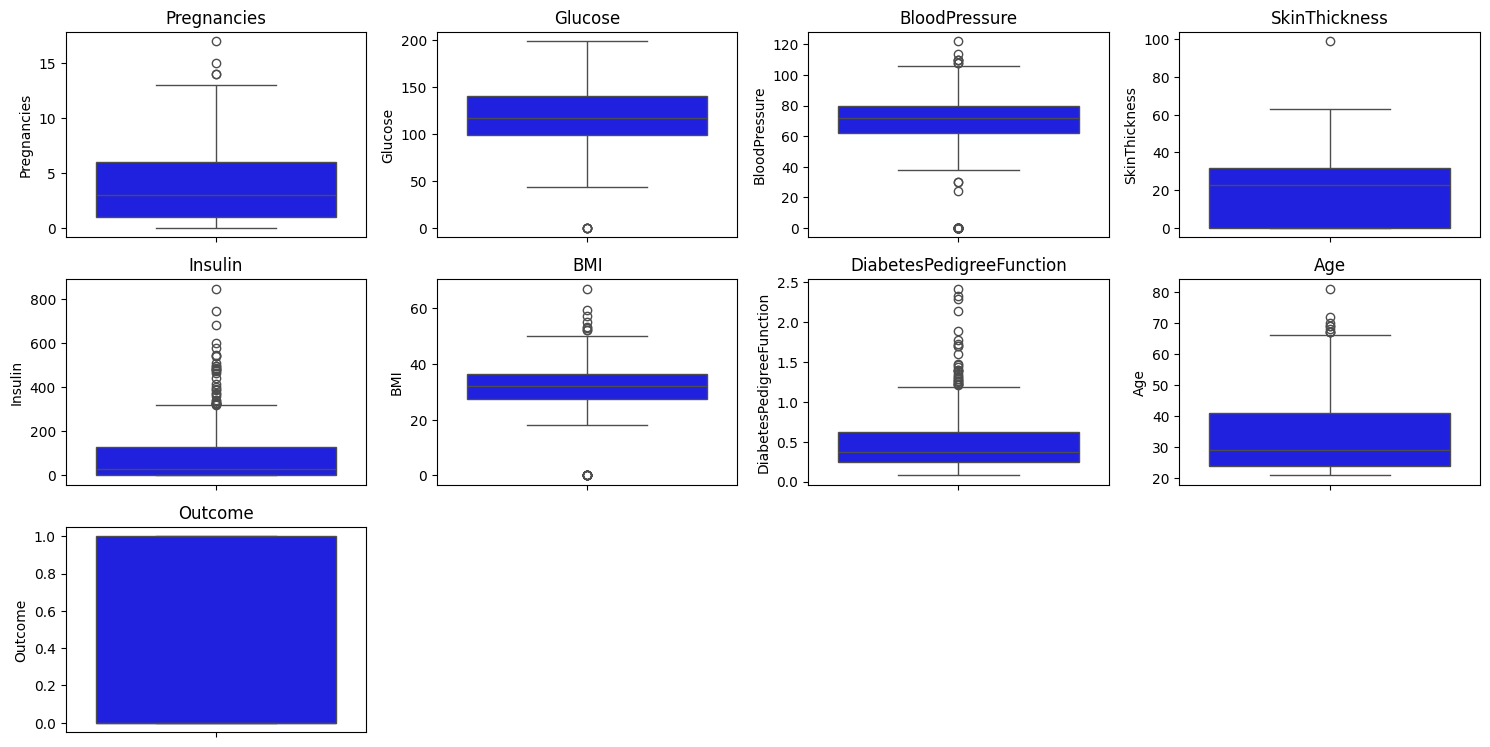

In [48]:

# Create box plots for each parameter in the dataset
plt.figure(figsize=(15, 10))
for i, col in enumerate(diabetes_dataset.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=diabetes_dataset[col], color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()


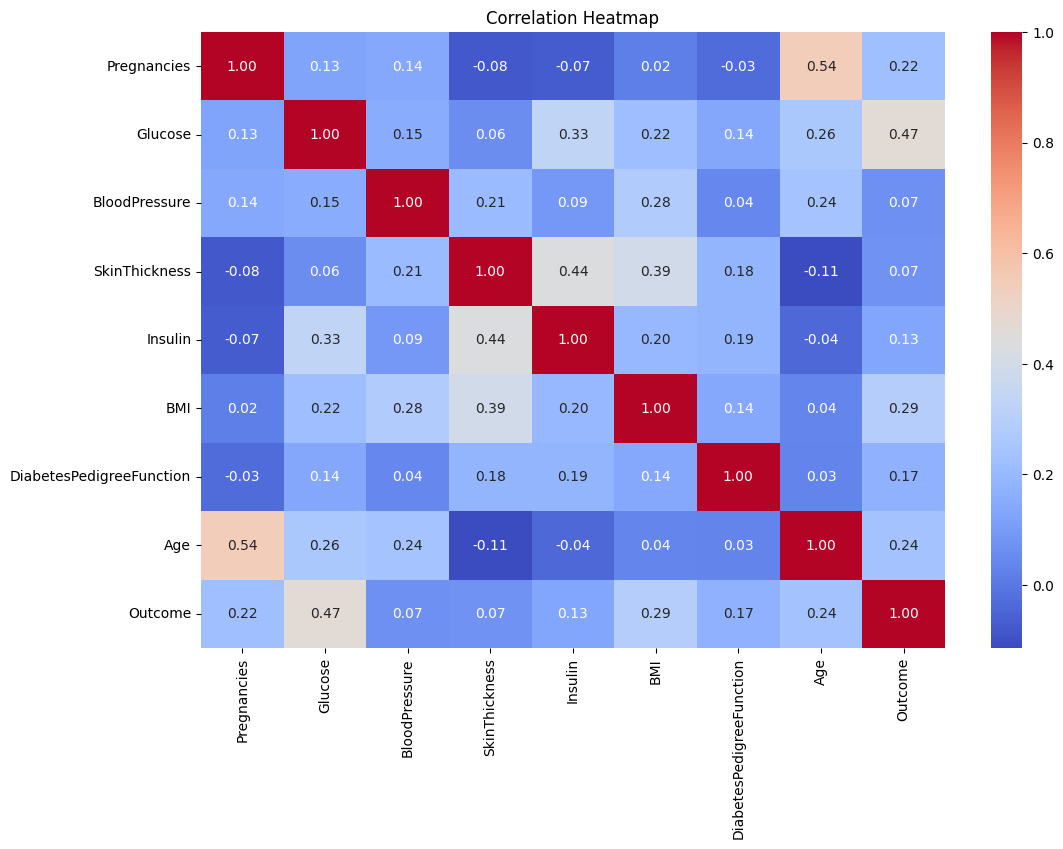

In [45]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = diabetes_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
from sklearn.svm import SVC

In [35]:
from sklearn.svm import SVC

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear SVM model
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, Y_train)

SVC(kernel='linear', random_state=42)

C:\Users\singh\AppData\Local\Temp\ipykernel_9316\1377858405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes_dataset, palette='viridis')


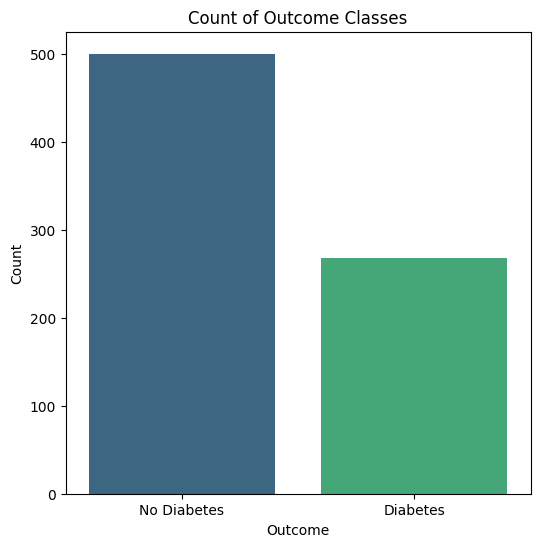

In [38]:
# Plotting the count of Outcome classes
plt.figure(figsize=(6, 6))
sns.countplot(x='Outcome', data=diabetes_dataset, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Outcome Classes')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Setting labels for 0 and 1
plt.show()

In [39]:
import pickle

In [40]:
#saving the model
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [41]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [42]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [43]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
